## Importing Libraries and Load Dataset

In [1]:
# Loading data set using pandas.
import pandas as pd

file= "Eminem_collection.csv"
df = pd.read_csv(file)
df.head(10)

COMMENT_ID                AUTHOR  \
0      z12rwfnyyrbsefonb232i5ehdxzkjzjs2           Lisa Wellas   
1    z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04          jason graham   
2      z13vsfqirtavjvu0t22ezrgzyorwxhpf3            Ajkal Khan   
3    z12wjzc4eprnvja4304cgbbizuved35wxcs         Dakota Taylor   
4      z13xjfr42z3uxdz2223gx5rrzs3dt5hna           Jihad Naser   
5    z133yfmjdur4dvyjr04ceh2osl2fvngrqi4       Darrion Johnson   
6      z12zgrw5furdsn0sc233hfwavnznyhicq              kyeman13   
7    z12vxdzzds2kzzrzq04cdjc4ozq2szuyl5o                 Damax   
8  z12gxdortqzwhhqas04cfjrwituzghb5tvk0k  Muhammad Asim Mansha   
9  z132wd4ywmicxj2gn04cdfhilyryjhmjhk00k            JuanPa Rap   

                         DATE  \
0                         NaN   
1  2015-05-29T02:26:10.652000   
2                         NaN   
3  2015-05-29T02:13:07.810000   
4                         NaN   
5  2015-05-29T01:27:30.360000   
6                         NaN   
7  2015-05-29T00:41:22.426000   
8                         NaN   
9  2015-05-28T23:23:41.231000   

                                             CONTENT  CLASS  
0          +447935454150 lovely girl talk to me xxx﻿      1  
1    I always end up coming back to this song<br />﻿      0  
2  my sister just received over 6,500 new <a rel=...      1  
3                                              Cool﻿      0  
4                     Hello I&#39;am from Palastine﻿      1  
5  Wow this video almost has a billion views! Did...      0  
6  Go check out my rapping video called Four Whee...      1  
7                                  Almost 1 billion﻿      0  
8                     Aslamu Lykum... From Pakistan﻿      1  
9  Eminem is idol for very people in España and M...      0

## Looking at Couple of Texts

In [2]:
# Printing a slice of text from row 2666, specifically the first 400 characters
print(repr(df.iloc[166]["CONTENT"][0:400]))
print(repr(df.iloc[226]["CONTENT"][0:400]))

'sorry but eminmem is a worthless wife beating bastard\ufeff'
'wtf. subscribe my channel thanx ;)'


## Let's Split Speech Into Sentences

In [3]:
 # Importing the regular expression
import re
# Splitting the text in the "CONTENT" column
df["paragraphs"] = df["CONTENT"].map(lambda CONTENT: re.split(r'\.\s*\n', CONTENT))
# Calculating the number of paragraphs for each row and storing it in a new column
df["number_of_paragraphs"] = df["paragraphs"].map(len)

## Start by Getting TFIDF

In [4]:
# Printing the shape of the TF-IDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords

tfidf_text_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['CONTENT'])
tfidf_text_vectors.shape

(448, 162)

## Making Data Frame of Sentences

In [5]:
paragraph_df = pd.DataFrame([{ "CONTENT": paragraph, "CLASS": CLASS }
               for paragraphs, CLASS in zip(df["paragraphs"], df["CLASS"])
                  for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

CONTENT  CLASS
0          +447935454150 lovely girl talk to me xxx﻿      1
1    I always end up coming back to this song<br />﻿      0
2  my sister just received over 6,500 new <a rel=...      1
3                                              Cool﻿      0
4                     Hello I&#39;am from Palastine﻿      1
5  Wow this video almost has a billion views! Did...      0
6  Go check out my rapping video called Four Whee...      1
7                                  Almost 1 billion﻿      0
8                     Aslamu Lykum... From Pakistan﻿      1
9  Eminem is idol for very people in España and M...      0

## Getting TFIDF of Sentences from DF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stopwords to a list
stopwords_list = list(stopwords)

# Create the TfidfVectorizer
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["CONTENT"])

# Display the shape of the resulting TF-IDF matrix
tfidf_para_vectors.shape

C:\Users\Alex\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(448, 157)

## NMF

In [7]:
from sklearn.decomposition import NMF
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

## Let’s Look at Our 10 Topics

In [8]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined nmf_text_model and tfidf_text_vectorizer
feature_names = tfidf_text_vectorizer.get_feature_names_out()
display_topics(nmf_text_model, feature_names)


Topic 00
 video (27.54)
 youtube (26.94)
 check (20.08)
 playlist (3.96)
 new (2.46)

Topic 01
 song (51.34)
 best (9.57)
 good (3.33)
 awesome (3.12)
 amazing (3.07)

Topic 02
 39 (13.00)
 just (4.14)
 quot (3.54)
 know (2.75)
 don (2.28)

Topic 03
 com (12.87)
 moneygq (7.29)
 check (4.57)
 000 (4.39)
 zonepa (4.34)

Topic 04
 love (66.99)
 lie (10.67)
 way (8.44)
 quot (1.45)
 music (1.07)

Topic 05
 eminem (47.85)
 best (6.60)
 rap (5.16)
 lt (3.05)
 artist (2.86)

Topic 06
 channel (31.97)
 check (23.10)
 beats (3.42)
 thanks (3.40)
 hey (3.19)

Topic 07
 subscribe (25.40)
 like (22.84)
 videos (3.90)
 music (3.58)
 watch (2.86)

Topic 08
 fox (36.77)
 megan (33.98)
 charlie (4.33)
 girl (4.23)
 lost (3.76)

Topic 09
 rihanna (63.14)
 win (4.21)
 page (4.05)
 fans (3.99)
 amazing (3.82)


## Running Same Model

In [9]:
from sklearn.decomposition import NMF

# Assuming tfidf_para_vectors and tfidf_para_vectorizer are already defined
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 video (27.54)
 youtube (27.02)
 check (19.80)
 playlist (3.89)
 new (2.47)

Topic 01
 song (52.99)
 best (9.82)
 good (3.58)
 awesome (3.20)
 amazing (3.10)

Topic 02
 like (34.08)
 type (3.73)
 comment (3.59)
 br (3.41)
 quot (3.29)

Topic 03
 com (13.94)
 moneygq (7.89)
 check (4.94)
 zonepa (4.81)
 000 (4.75)

Topic 04
 love (63.22)
 lie (10.02)
 way (7.95)
 rihanna (4.95)
 quot (1.95)

Topic 05
 eminem (43.87)
 rihanna (7.45)
 best (5.87)
 rap (4.94)
 lt (2.71)

Topic 06
 channel (29.99)
 check (22.38)
 hey (3.34)
 beats (3.28)
 thanks (3.26)

Topic 07
 39 (16.54)
 know (3.17)
 quot (3.17)
 don (2.72)
 thank (1.84)

Topic 08
 fox (37.44)
 megan (34.60)
 charlie (4.41)
 girl (4.30)
 lost (3.81)

Topic 09
 subscribe (49.45)
 videos (6.15)
 rihanna (5.59)
 watch (5.14)
 music (4.64)


## How “BIG” is Each Topic?

In [10]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([11.4430495 , 10.23474789, 11.06584635, 10.29329225,  8.91770628,
       10.56596613, 13.35903606, 11.67328223,  6.15427034,  6.29280298])

## Topic sizes

In [11]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([10.60491205,  9.42431832,  7.90802066,  9.39473857,  8.9701299 ,
       10.08522725, 12.94750017, 15.44743138,  5.59006548,  9.62765622])

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["CONTENT"])
count_para_vectors.shape

C:\Users\Alex\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(448, 157)

# Latent Dirichlet Allocation

## Starting by Cutting Paragraphs Into Words

In [13]:
# Printing the shape of the count vector matrix
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["CONTENT"])
count_para_vectors.shape

(448, 157)

## Run the LDA

In [14]:
from sklearn.decomposition import LatentDirichletAllocation
lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
W_lda_para_matrix =lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

## Our 10 Topics

In [15]:
def display_lda_topics(model, feature_names, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined lda_para_model and count_para_vectorizer
feature_names_lda = count_para_vectorizer.get_feature_names_out()
display_lda_topics(lda_para_model, feature_names_lda)


Topic 00
 39 (8.10)
 quot (4.71)
 like (3.90)
 subscribe (3.77)
 thank (3.68)

Topic 01
 com (13.32)
 check (8.64)
 moneygq (6.47)
 called (6.47)
 000 (6.08)

Topic 02
 video (18.19)
 new (9.19)
 music (7.46)
 check (7.35)
 share (4.53)

Topic 03
 song (21.87)
 39 (17.23)
 eminem (7.92)
 love (5.52)
 good (4.21)

Topic 04
 check (23.65)
 channel (20.38)
 zonepa (9.34)
 subscribe (5.98)
 thanks (5.27)

Topic 05
 views (5.92)
 39 (5.07)
 rapper (4.99)
 know (4.40)
 getting (3.85)

Topic 06
 check (18.62)
 youtube (17.12)
 video (10.65)
 im (4.94)
 2015 (3.98)

Topic 07
 like (23.35)
 subscribe (16.72)
 check (5.74)
 hi (5.56)
 videos (5.34)

Topic 08
 br (18.21)
 fox (9.14)
 megan (8.53)
 com (7.93)
 https (7.32)

Topic 09
 love (15.44)
 rihanna (12.88)
 quot (11.32)
 eminem (7.11)
 way (6.75)


## Topic size

In [16]:
# Calculate the percentage in the matrix W_lda_para_matrix
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 8.92118979,  9.38030298,  9.48904714, 15.23460946,  9.38429724,
        7.45322458, 11.67196008,  8.39546882,  8.78098674, 11.28891317])

In [17]:
!pip install pyLDAvis

## pyLDAvis

In [18]:
import pyLDAvis

# Assuming lda_para_model, count_para_vectors, and count_para_vectorizer are already defined

# Extract vocabulary and term frequencies from CountVectorizer
vocab = count_para_vectorizer.get_feature_names_out()
term_frequency = count_para_vectors.sum(axis=0).A1

# Get the topic-term distribution matrix from LDA model
topic_term_dists = lda_para_model.components_

# Get the document-topic distribution matrix from LDA model
doc_topic_dists = lda_para_model.transform(count_para_vectors)

# Get the document lengths
doc_lengths = count_para_vectors.sum(axis=1).A1

# Prepare the visualization
lda_display = pyLDAvis.prepare(
    topic_term_dists,
    doc_topic_dists,
    doc_lengths,
    vocab=vocab,
    term_frequency=term_frequency
)

# Display the visualization
pyLDAvis.display(lda_display)

## Drawing Word Clouds for 10 Topics

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1]  # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])

        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)

        plt.figure(figsize=(12, 12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")

        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

# Assuming you have already trained an NMF or LDA model and have the features (terms)
# Replace the following with your actual model and features
# wordcloud_topics(your_model, your_features)

C:\Users\Alex\AppData\Local\Temp\ipykernel_4392\3871423914.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


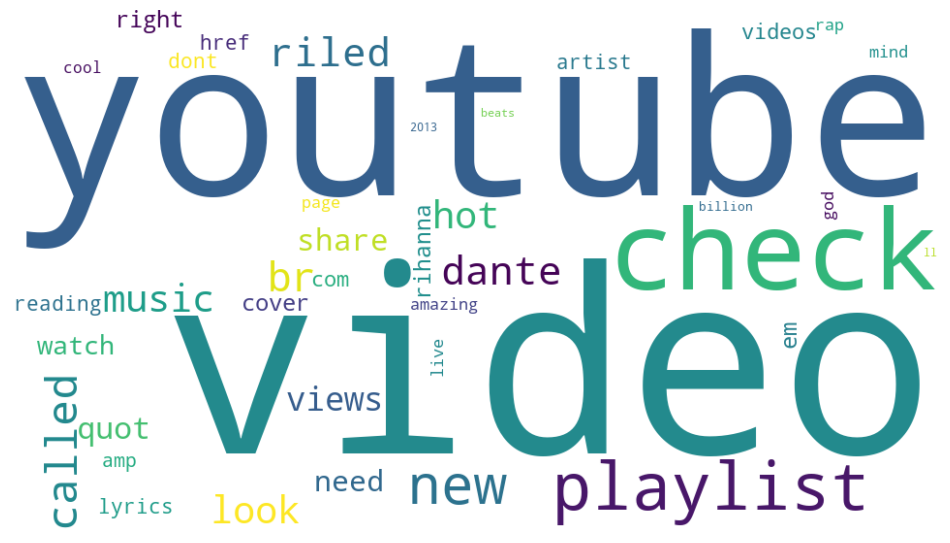

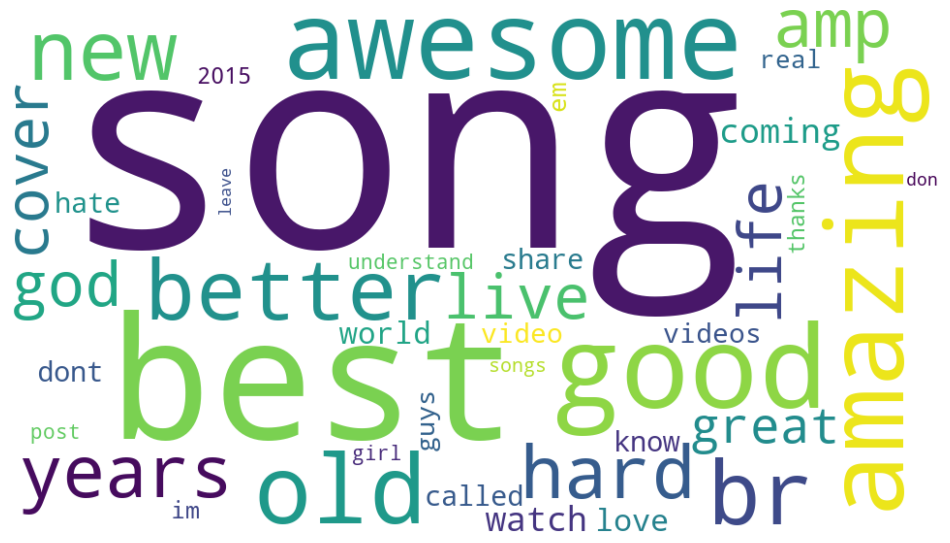

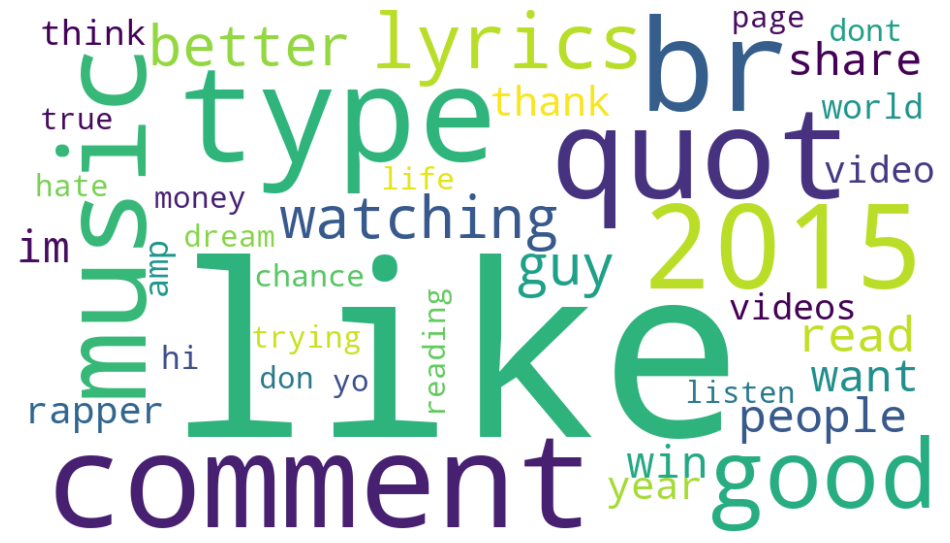

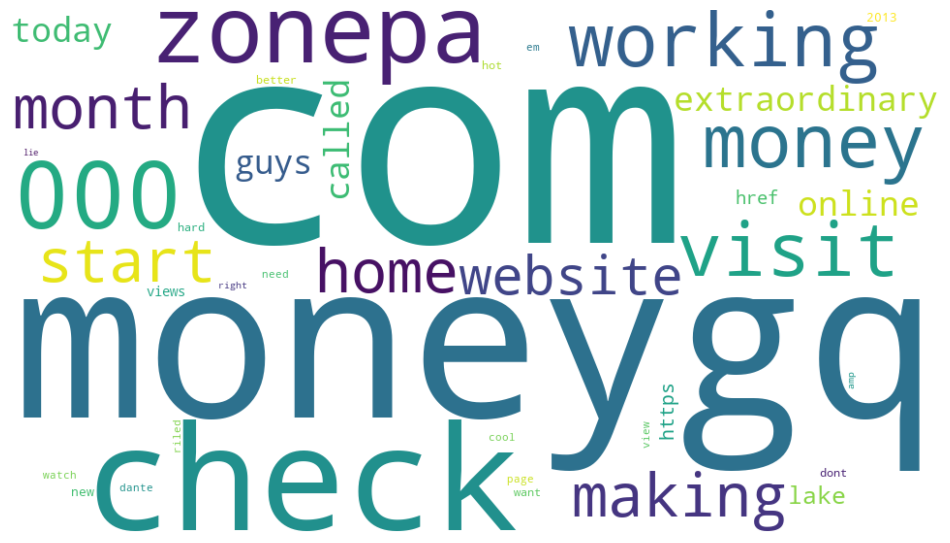

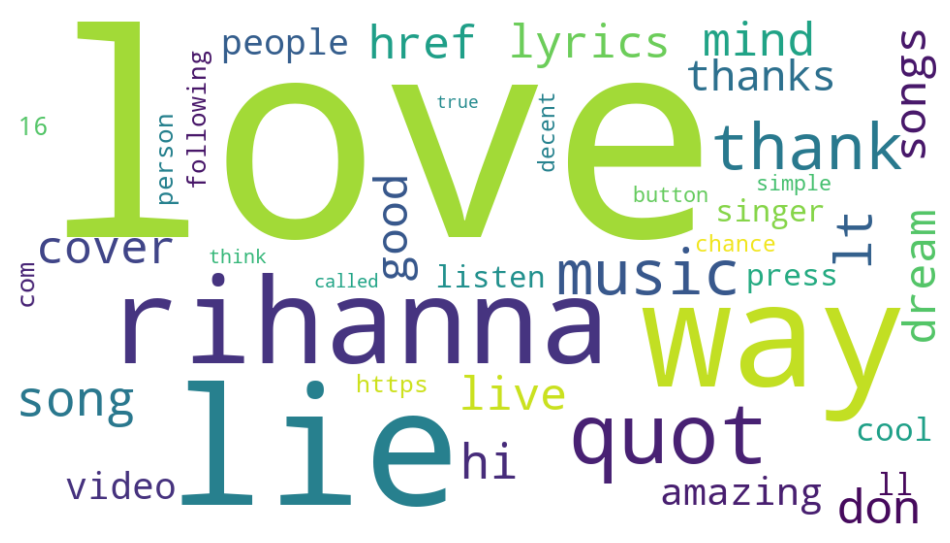

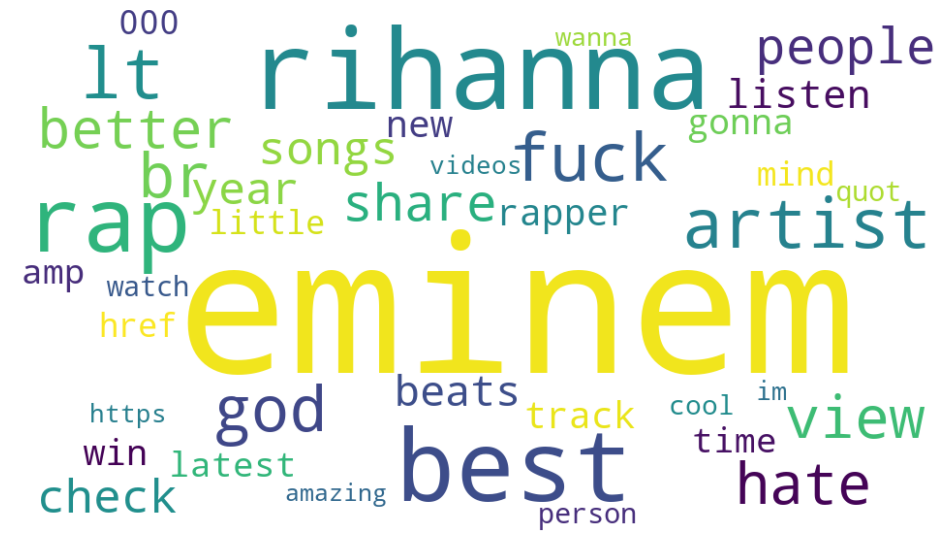

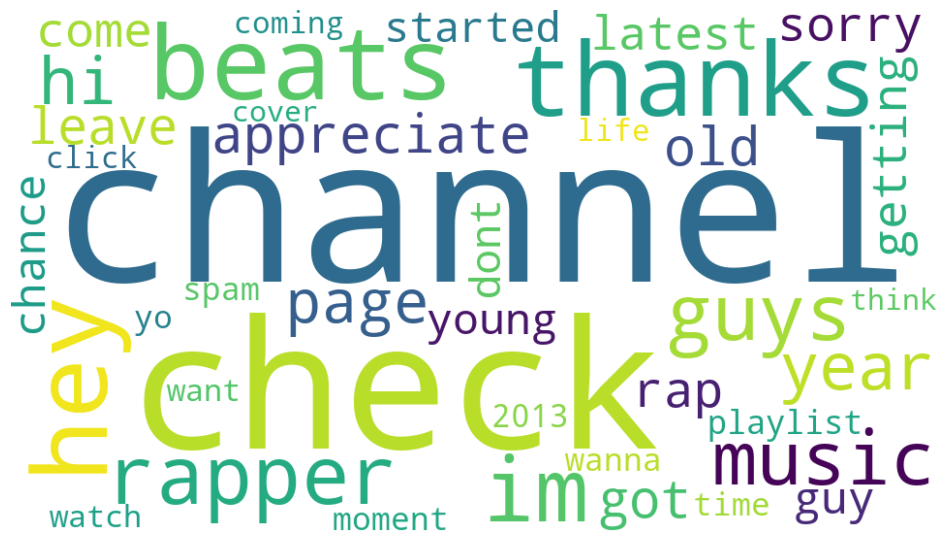

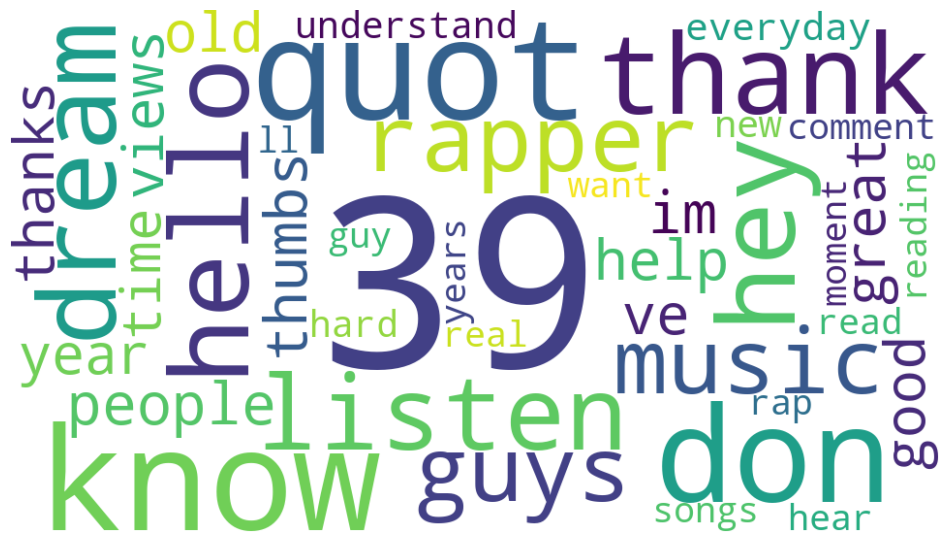

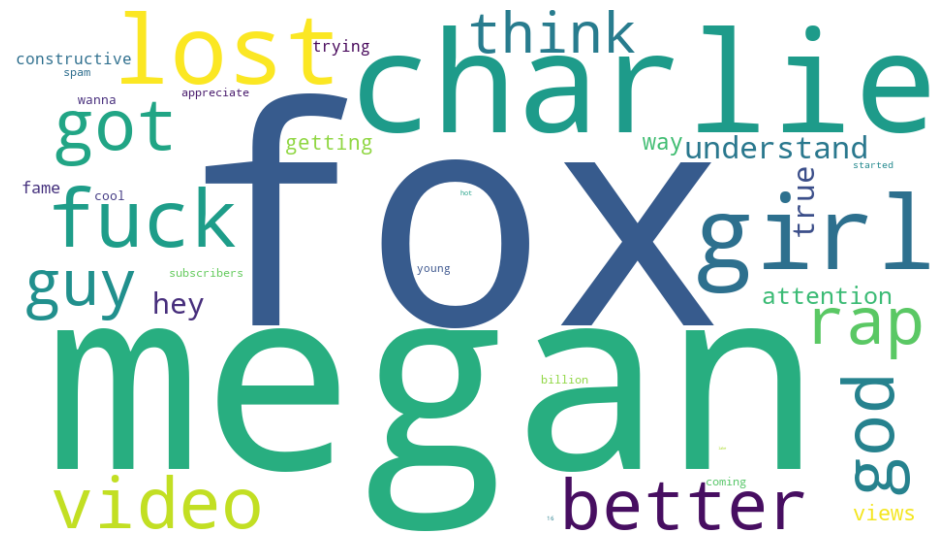

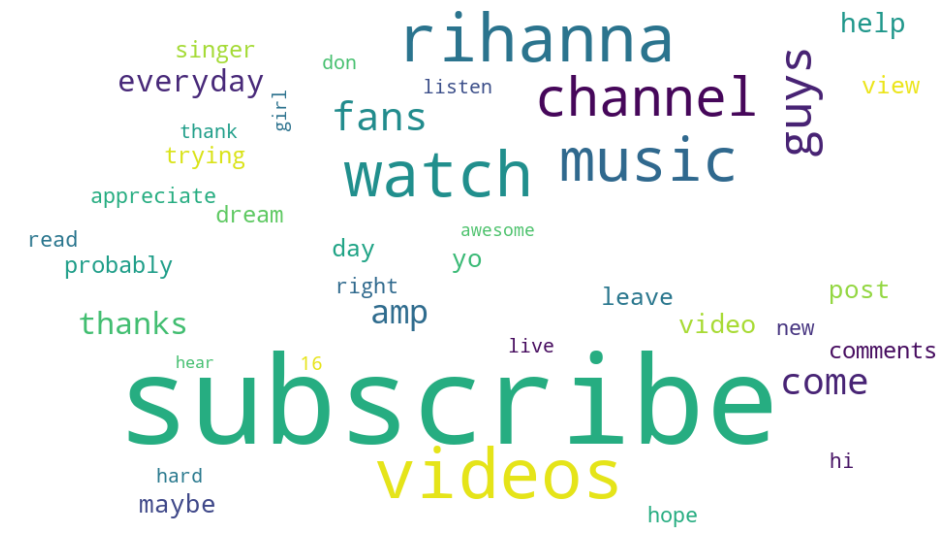

In [20]:
wordcloud_topics(nmf_para_model, count_para_vectorizer.get_feature_names_out())

## The LDA WordClouds

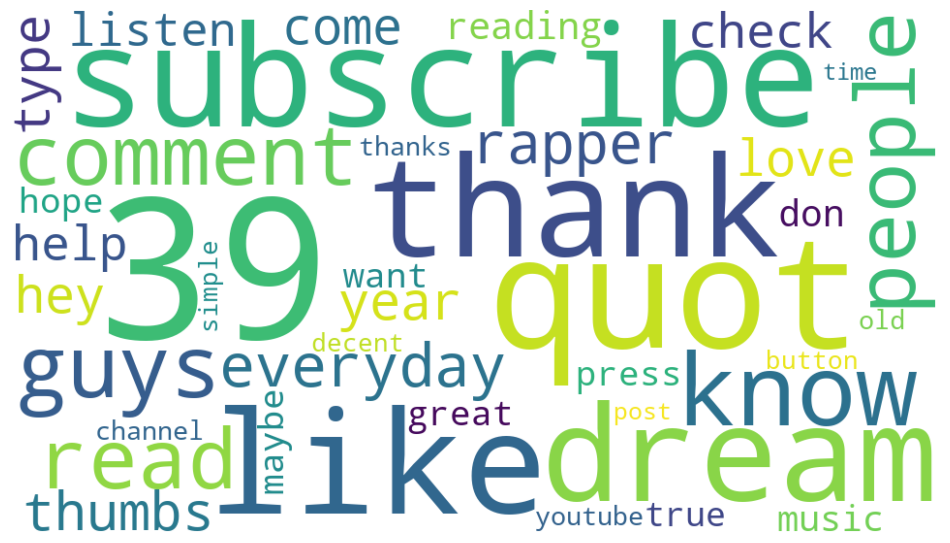

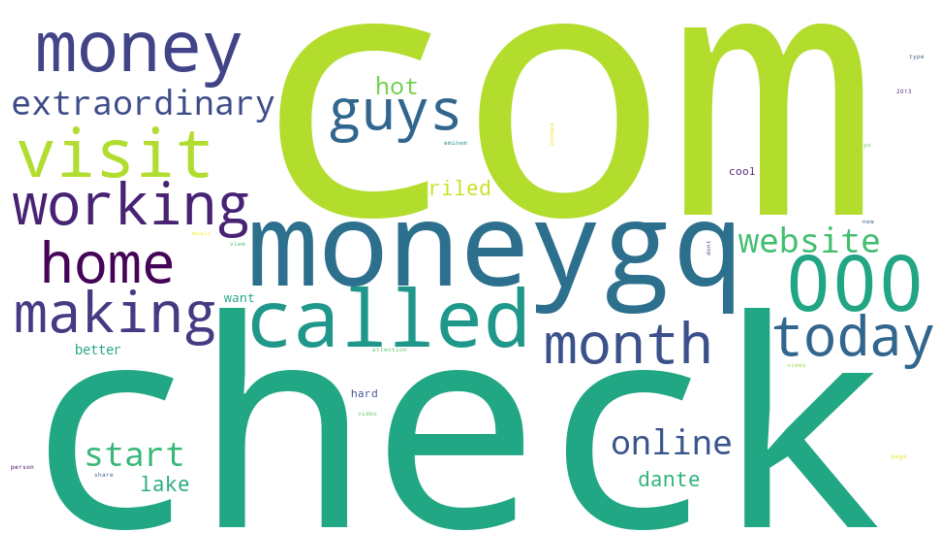

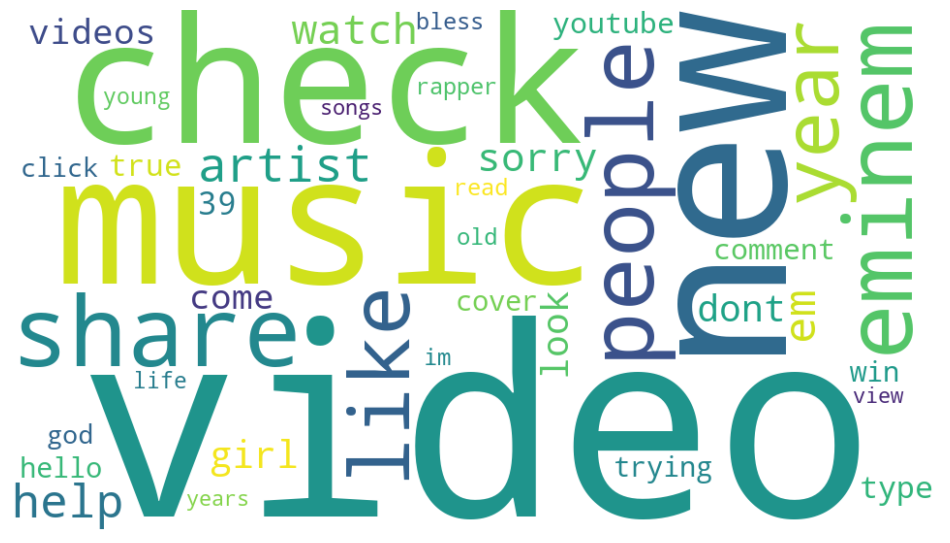

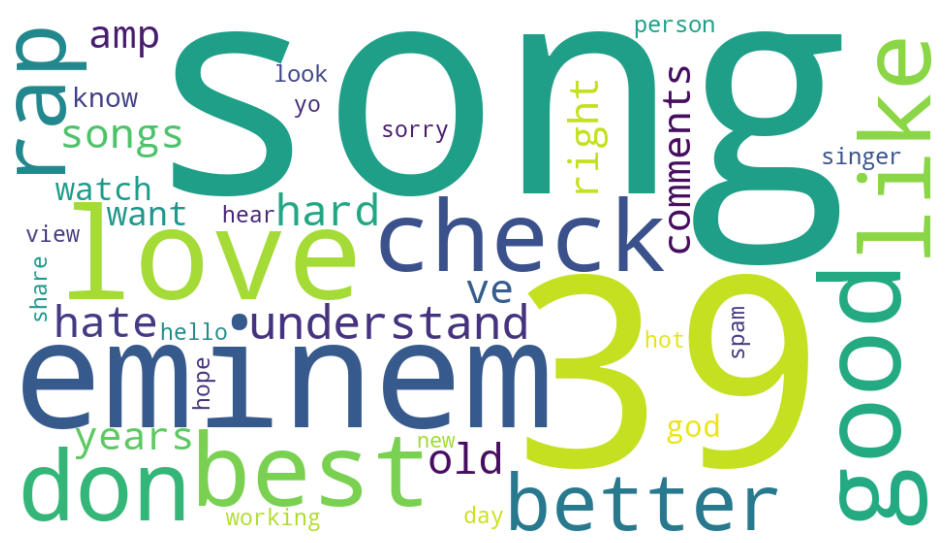

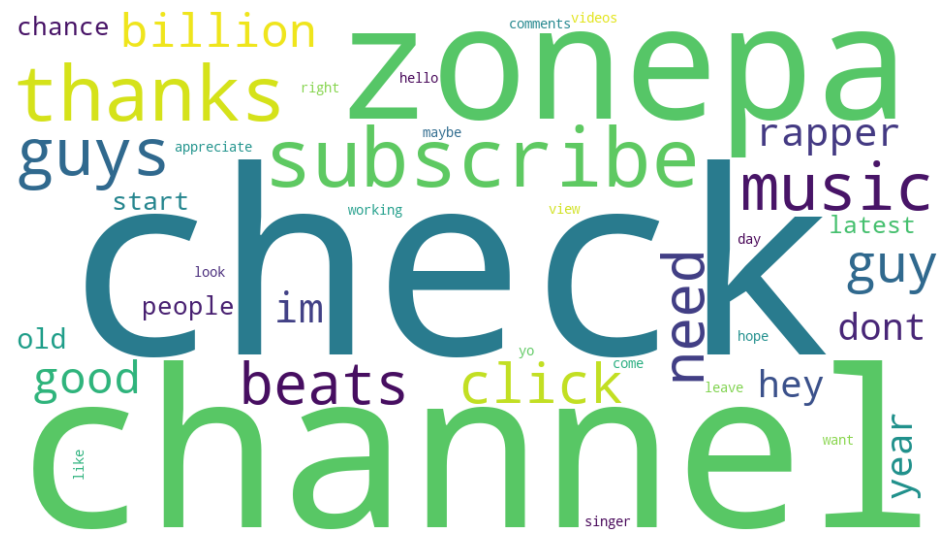

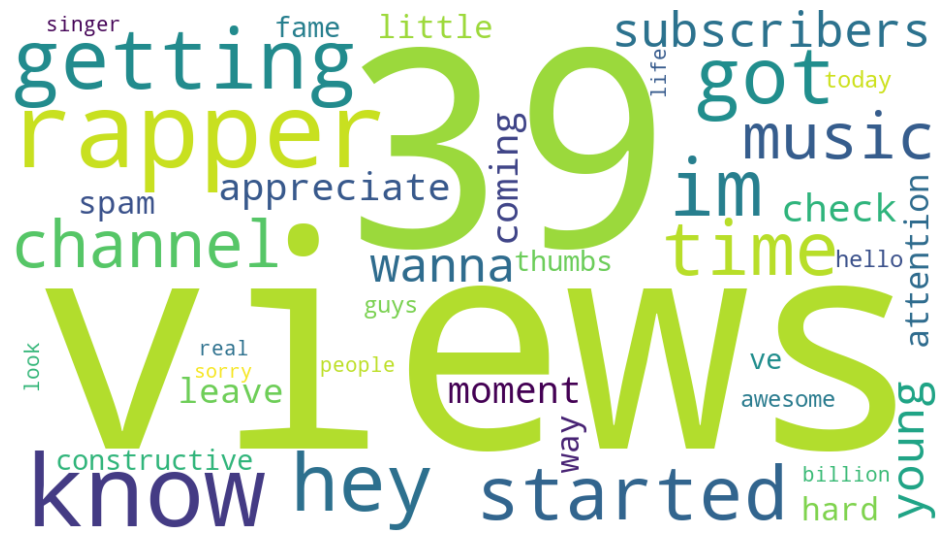

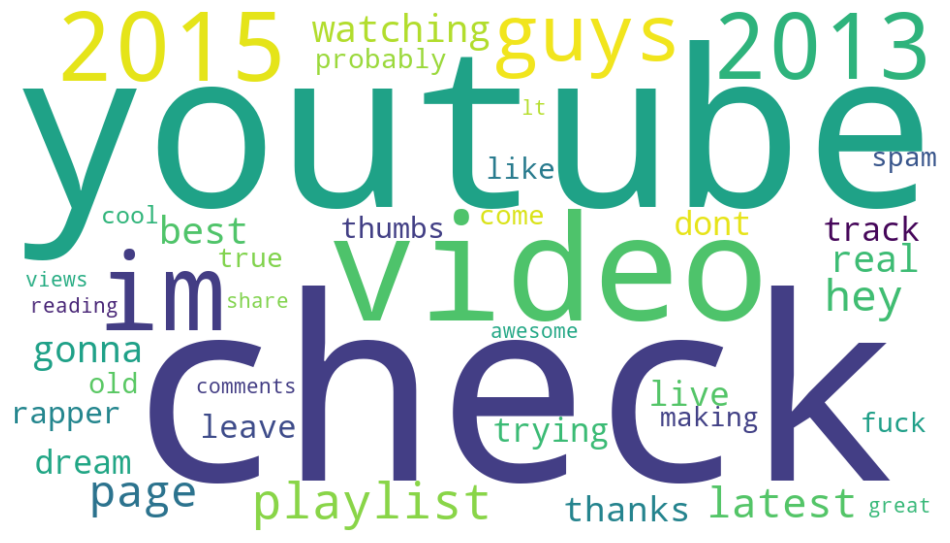

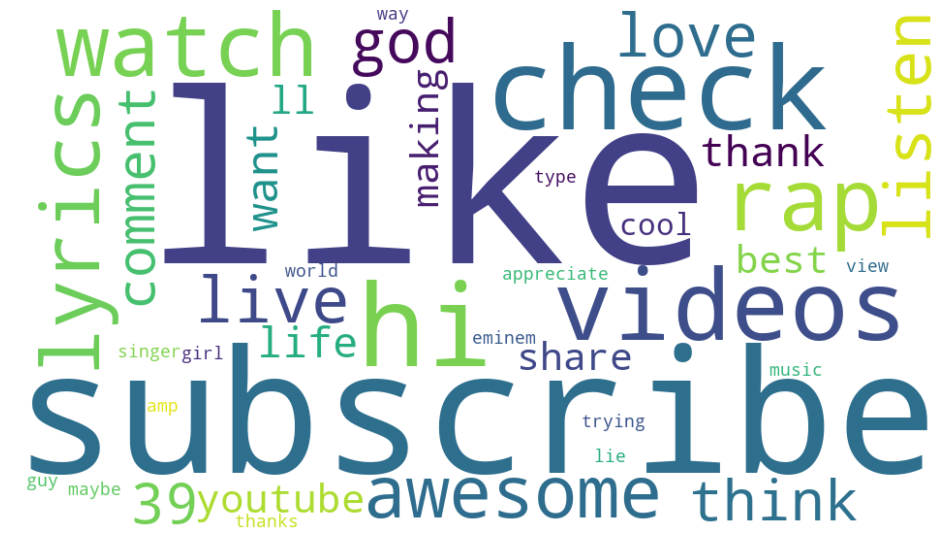

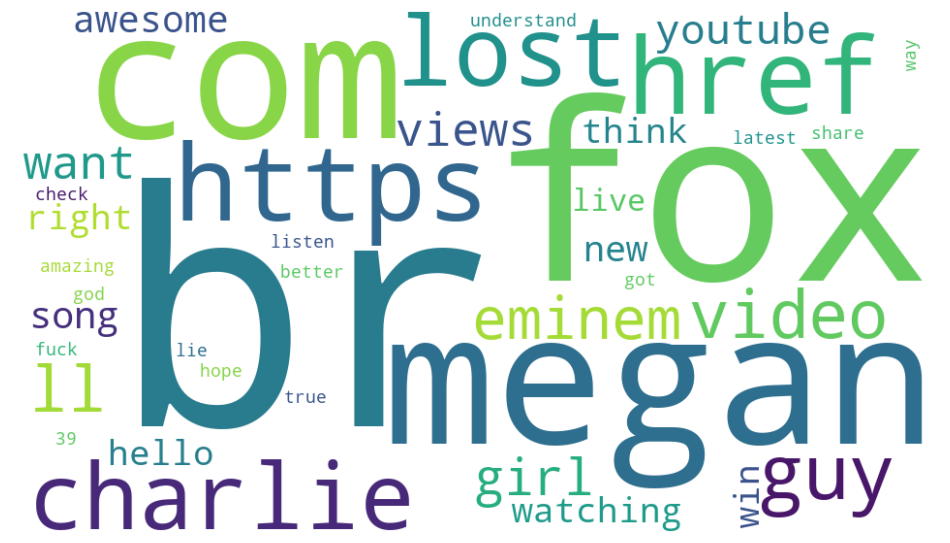

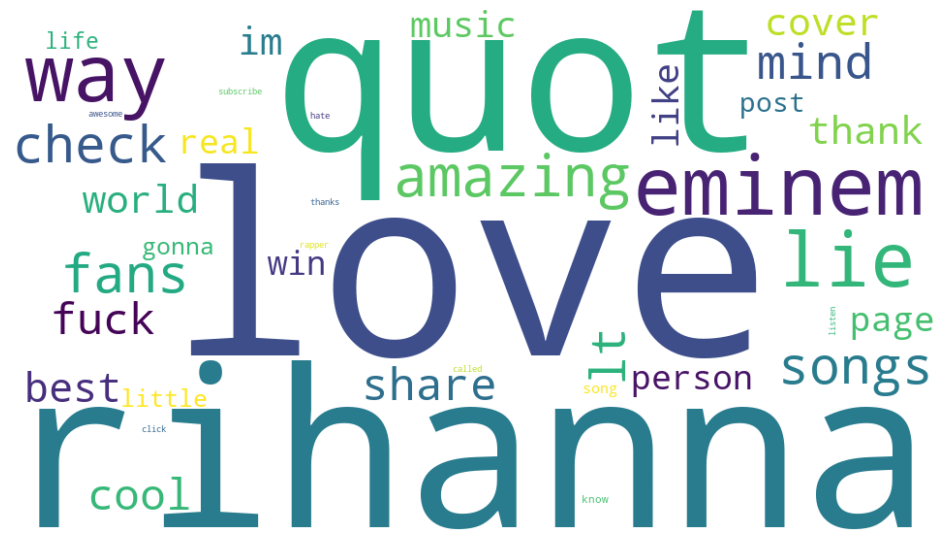

In [21]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

## Topics Names by Joining Top 2 Words

In [22]:
topic_names = []
voc = count_para_vectorizer.get_feature_names_out()

print("Vocabulary:", voc)

for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

print("Topic Names:", topic_names)

Vocabulary: ['000' '16' '2013' '2015' '39' 'amazing' 'amp' 'appreciate' 'artist'
 'attention' 'awesome' 'beats' 'best' 'better' 'billion' 'bless' 'br'
 'button' 'called' 'chance' 'channel' 'charlie' 'check' 'click' 'com'
 'come' 'coming' 'comment' 'comments' 'constructive' 'cool' 'cover'
 'dante' 'day' 'decent' 'don' 'dont' 'dream' 'em' 'eminem' 'everyday'
 'extraordinary' 'fame' 'fans' 'following' 'fox' 'fuck' 'getting' 'girl'
 'god' 'gonna' 'good' 'got' 'great' 'guy' 'guys' 'hard' 'hate' 'hear'
 'hello' 'help' 'hey' 'hi' 'home' 'hope' 'hot' 'href' 'https' 'im' 'know'
 'lake' 'latest' 'leave' 'lie' 'life' 'like' 'listen' 'little' 'live' 'll'
 'look' 'lost' 'love' 'lt' 'lyrics' 'making' 'maybe' 'megan' 'mind'
 'moment' 'money' 'moneygq' 'month' 'music' 'need' 'new' 'old' 'online'
 'page' 'people' 'person' 'playlist' 'post' 'press' 'probably' 'quot'
 'rap' 'rapper' 'read' 'reading' 'real' 'right' 'rihanna' 'riled' 'share'
 'simple' 'singer' 'song' 'songs' 'sorry' 'spam' 'start' 'started

## Separating Data by Year

In [23]:
from tqdm.auto import tqdm
import numpy as np

class_data = []

# Assuming paragraph_df is a DataFrame with a "year" column
for CLASS in tqdm(np.unique(paragraph_df["CLASS"])):
    W_class = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["CLASS"] == CLASS)])
    class_data.append([CLASS] + list(W_class.sum(axis=0) / W_class.sum() * 100.0))

  0%|          | 0/2 [00:00<?, ?it/s]

<Axes: xlabel='COMMENT_ID'>

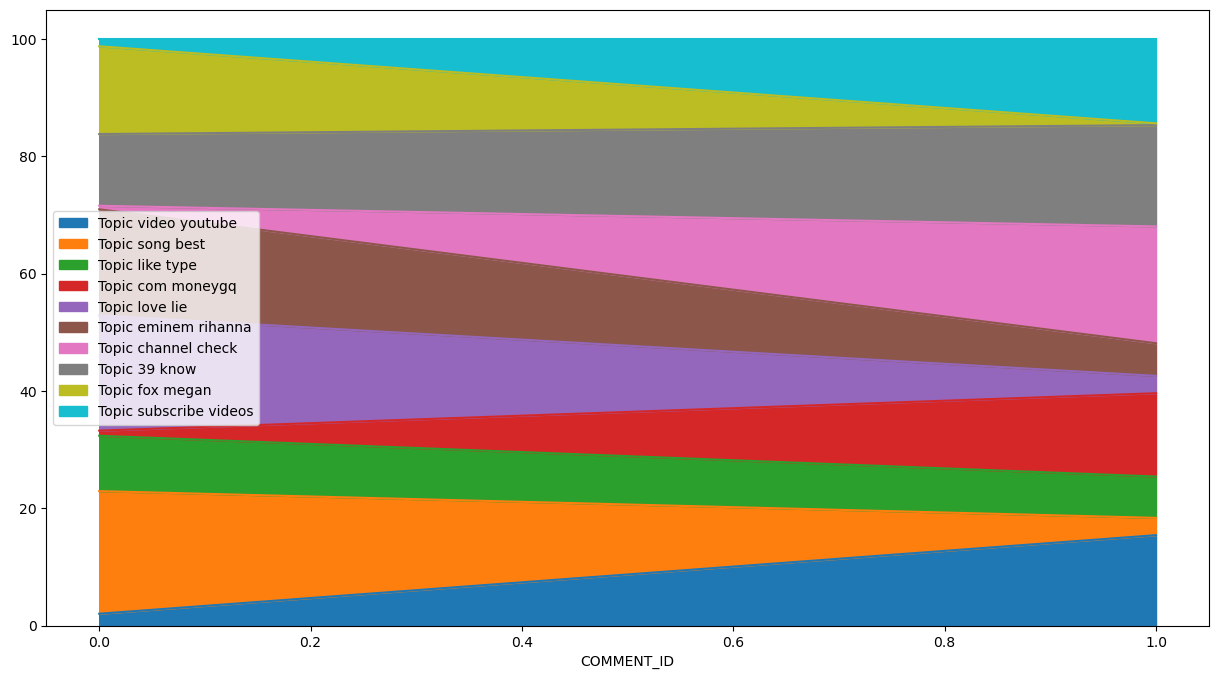

In [27]:
import matplotlib.pyplot as plt
df_comment = pd.DataFrame(class_data, columns=["COMMENT_ID"] + topic_names).set_index("COMMENT_ID")
df_comment.plot.area(figsize=(15,8))